# Telecom Churn Case Study

## Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Table of Contents

* [1. Data Understanding](#dataUnderstanding)

* [2. Data Cleaning & Preparation](#dataPreparation)
 
* [3. Exploratory Data Analysis](#eda)

* [4. Model Implementation & Evaluations](#modelling)

    * [4.1 Dataset Imbalance Treatment (SMOTE)](#imbalanceTreatment)
    
    * [4.2 Applying PCA on the Data](#pcaImpl)
    
    * [4.3 Scree Plot Creation](#screePlot)

    * [4.4 Performing Logistic Regression With PCA](#lrpca)

    * [4.5 Performing Logistic Regression Without PCA](#lr)

    * [4.6 Performing SVM With PCA](#svmpca)

    * [4.7 Performing SVM Without PCA](#svm)

    * [4.8 Performing RandomForest With PCA](#rfpca)

    * [4.9 Performing RandomForest With HPT & PCA](#rfhptpca)

    * [4.10 Performing RandomForest Without PCA](#rf)

    * [4.11 Performing RandomForest HPT Without PCA](#rfhpt)

    * [4.12 Performing XGBoost With PCA](#xgbpca)

    * [4.13 Performing XGBoost Without PCA](#xgb)

    
* [5. Model Evaluation Matrix](#modelevaluation)

* [6. Recommendations](#observation)



### 1. Data Understanding <a class="anchor" id="dataUnderstanding"></a>


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import itertools
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv and checking the top 5 values
df_telecom_churn_data = pd.read_csv('telecom_churn_data.csv')
df_telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking the number of rows and number of columns
df_telecom_churn_data.shape

(99999, 226)

In [4]:
# Checking the dataframe, describing the various columns
df_telecom_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### 2. Data Cleaning & Preparation<a class="anchor" id="dataPreparation"></a>

In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.


### In this case study, 6th and 7th month will be good phase, 8th month will be action phase and 9th month will be the churn phase.

In [5]:
# Checking the percentage of null values present for each column in the data
df_telecom_churn_data.isnull().sum()/len(df_telecom_churn_data)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [6]:
# Checking the variance in values for the column circle id
df_telecom_churn_data.circle_id.describe()

count    99999.0
mean       109.0
std          0.0
min        109.0
25%        109.0
50%        109.0
75%        109.0
max        109.0
Name: circle_id, dtype: float64

#### Since all the values in the circle_id column is same, suggesting this data belongs to the same circle, hence dropping this columns, as this will not help in the classification of the customer

In [7]:
# Dropping the circle_id column from the dataframe
df_telecom_churn_data=df_telecom_churn_data.drop("circle_id",axis=1)

In [8]:
# Checking the columns related to the recharge and data
recharge_data_related_columns=df_telecom_churn_data.columns[df_telecom_churn_data.columns.str.
                                                            contains('rech_amt|rech_data')]
recharge_data_related_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [9]:
# Checking the missing values in the columns related recharge and data

df_telecom_churn_data[recharge_data_related_columns].isnull().sum()/len(df_telecom_churn_data)*100

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

#### There are multiple columns where more than 73% of data is missing, we need to handle the missing values

In [10]:
# Checking the range of values for the recharge and data columns
df_telecom_churn_data[recharge_data_related_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


#### Based on the above, as such there are no outliers. We are going to impute the missing value with 0, this imputation is required to derive certain new columns, which will be used for analysis

In [11]:
# Imputing the missing values, replacing NA with 1, for Good and action phase 
df_telecom_churn_data['total_rech_data_6']=df_telecom_churn_data.total_rech_data_6.replace(np.NAN,0)
df_telecom_churn_data['total_rech_data_7']=df_telecom_churn_data.total_rech_data_7.replace(np.NAN,0)
df_telecom_churn_data['total_rech_data_8']=df_telecom_churn_data.total_rech_data_8.replace(np.NAN,0)

df_telecom_churn_data['av_rech_amt_data_6']=df_telecom_churn_data.av_rech_amt_data_6.replace(np.NAN,0)
df_telecom_churn_data['av_rech_amt_data_7']=df_telecom_churn_data.av_rech_amt_data_7.replace(np.NAN,0)
df_telecom_churn_data['av_rech_amt_data_8']=df_telecom_churn_data.av_rech_amt_data_8.replace(np.NAN,0)


In [12]:
# Deriving new columns from the total recharge data and average recharge amount for Good and action phase
# this new column will give us total amount spend on the data
df_telecom_churn_data['total_rech_amount_data_6']=df_telecom_churn_data['total_rech_data_6']*df_telecom_churn_data['av_rech_amt_data_6']
df_telecom_churn_data['total_rech_amount_data_7']=df_telecom_churn_data['total_rech_data_7']*df_telecom_churn_data['av_rech_amt_data_7'] 
df_telecom_churn_data['total_rech_amount_data_8']=df_telecom_churn_data['total_rech_data_8']*df_telecom_churn_data['av_rech_amt_data_8']     
    

In [13]:
# Now since we have derived the new columns from the data used and average recharge amount,
# we can drop the columns used for the derivation and use new columns in model building
df_telecom_churn_data.drop(["total_rech_data_6","total_rech_data_7","total_rech_data_8",'av_rech_amt_data_6',
                           'av_rech_amt_data_7','av_rech_amt_data_8'],axis=1,inplace=True)

In [14]:
# Deriving new column for the average amount spent by the customer in the good phase i.e 6th and 7th month
df_telecom_churn_data['total_avg_rech_amt_6_7']=(df_telecom_churn_data.total_rech_amt_6 + df_telecom_churn_data.total_rech_amount_data_6 \
                                               + df_telecom_churn_data.total_rech_amt_7+ df_telecom_churn_data.total_rech_amount_data_7)/2

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, we will define high-value customers

### Filtering High Value Customers
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [15]:
high_value_customer_filter=df_telecom_churn_data.total_avg_rech_amt_6_7.quantile(0.7)
print("70th percentile value for the Good phase is",high_value_customer_filter)
df_telecom_churn_data_hvc = df_telecom_churn_data[df_telecom_churn_data.total_avg_rech_amt_6_7>high_value_customer_filter]
print("Dataframe shape after filtering the values",df_telecom_churn_data_hvc.shape)

70th percentile value for the Good phase is 478.0
Dataframe shape after filtering the values (29953, 223)


#### Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [16]:
# Let us first check the null values present in the 4 columns, which will be used to tag churners


df_telecom_churn_data_hvc[["total_ic_mou_9","total_og_mou_9",'vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()/len(df_telecom_churn_data_hvc)*100

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [17]:
# Defining the function to check the percentage of null values present for each column in the data
def check_the_null_values_in_data():    
    return df_telecom_churn_data_hvc.isnull().sum()/len(df_telecom_churn_data_hvc)*100

All the values are present, there are no missing values

In [18]:
# adding the new columns chrun to the dataframe and initializing with 0

df_telecom_churn_data_hvc['churn']=0

In [19]:
# now we all set the churn to 1, where all the columns considered above has value 0

df_telecom_churn_data_hvc['churn']=np.where(df_telecom_churn_data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
df_telecom_churn_data_hvc.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_data_6,total_rech_amount_data_7,total_rech_amount_data_8,total_avg_rech_amt_6_7,churn
0,7000842753,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,

In [20]:
# Checking percentage if chrun data

print("Percentage of customers chruned:",100*df_telecom_churn_data_hvc.churn.sum()/len(df_telecom_churn_data_hvc))

Percentage of customers chruned: 8.122725603445398


In [21]:
df_telecom_churn_data_hvc.shape

(29953, 224)

In [22]:
# Since 9th month is the churn month, finding all the columns for the 9th month
columns_for_the_9_month=df_telecom_churn_data_hvc.columns[df_telecom_churn_data_hvc.columns.str.contains("_9")]
columns_for_the_9_month

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [23]:
df_telecom_churn_data_hvc.shape

(29953, 224)

In [24]:
# dropping all the columns for the churn month
df_telecom_churn_data_hvc = df_telecom_churn_data_hvc.drop(columns_for_the_9_month,axis=1)
df_telecom_churn_data_hvc.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_data_6,total_rech_amount_data_7,total_rech_amount_data_8,total_avg_rech_amt_6_7,churn
0,7000842753,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790

In [25]:
# Checking the percentage of null values present for each column in the data

check_the_null_values_in_data()

mobile_number                0.000000
loc_og_t2o_mou               0.744500
std_og_t2o_mou               0.744500
loc_ic_t2o_mou               0.744500
last_date_of_month_6         0.000000
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.809502
onnet_mou_7                  1.789470
onnet_mou_8                  3.912797
offnet_mou_6                 1.809502
offnet_mou_7                 1.789470
offnet_mou_8                 3.912797
roam_ic_mou_6                1.809502
roam_ic_mou_7                1.789470
roam_ic_mou_8                3.912797
roam_og_mou_6                1.809502
roam_og_mou_7                1.789470
roam_og_mou_8                3.912797
loc_og_t2t_mou_6             1.809502
loc_og_t2t_mou_7             1.789470
loc_og_t2t_mou_8             3.912797
loc_og_t2m_mou_6             1.809502
loc_og_t2m_m

In [26]:
# From the above null values we will look at the max_rech first to see the distribution of values
df_telecom_churn_data_hvc[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16740.000000,17038.000000,15935.000000
mean,139.804002,140.444712,136.353373
std,118.892926,120.295284,119.571138
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


In [27]:
# max recharg columns have more than 43% missing values, we need to handle the same
# Imputing 0 in the max_rech, considering no recharges were done for the data

df_telecom_churn_data_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= df_telecom_churn_data_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

In [28]:
# Checking the percentage of null values present for each column in the data, after performing above step

check_the_null_values_in_data()

mobile_number                0.000000
loc_og_t2o_mou               0.744500
std_og_t2o_mou               0.744500
loc_ic_t2o_mou               0.744500
last_date_of_month_6         0.000000
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.809502
onnet_mou_7                  1.789470
onnet_mou_8                  3.912797
offnet_mou_6                 1.809502
offnet_mou_7                 1.789470
offnet_mou_8                 3.912797
roam_ic_mou_6                1.809502
roam_ic_mou_7                1.789470
roam_ic_mou_8                3.912797
roam_og_mou_6                1.809502
roam_og_mou_7                1.789470
roam_og_mou_8                3.912797
loc_og_t2t_mou_6             1.809502
loc_og_t2t_mou_7             1.789470
loc_og_t2t_mou_8             3.912797
loc_og_t2m_mou_6             1.809502
loc_og_t2m_m

In [29]:
# count_rech columns and average revenue per user present in the data have more than 43% of missing values
# there are other columns present in the database which can be used to check the 2g and 3g data
# we can drop these columns having more than 43% missing values

df_telecom_churn_data_hvc.drop(['count_rech_2g_6','count_rech_2g_7',\
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'\
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)


In [30]:
df_telecom_churn_data_hvc.shape

(29953, 158)

In [31]:
# Checking the percentage of null values present for each column in the data, after performing above step

check_the_null_values_in_data()

mobile_number                0.000000
loc_og_t2o_mou               0.744500
std_og_t2o_mou               0.744500
loc_ic_t2o_mou               0.744500
last_date_of_month_6         0.000000
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.809502
onnet_mou_7                  1.789470
onnet_mou_8                  3.912797
offnet_mou_6                 1.809502
offnet_mou_7                 1.789470
offnet_mou_8                 3.912797
roam_ic_mou_6                1.809502
roam_ic_mou_7                1.789470
roam_ic_mou_8                3.912797
roam_og_mou_6                1.809502
roam_og_mou_7                1.789470
roam_og_mou_8                3.912797
loc_og_t2t_mou_6             1.809502
loc_og_t2t_mou_7             1.789470
loc_og_t2t_mou_8             3.912797
loc_og_t2m_mou_6             1.809502
loc_og_t2m_m

In [32]:
# Dropping all those columns having more than 40% missing values

columns_percentage=check_the_null_values_in_data()
df_percentage_missing_data = pd.DataFrame({'column_name': df_telecom_churn_data_hvc.columns,\
                                           'percent_missing': columns_percentage})

columns_missing_more_than_40_percent=df_percentage_missing_data[df_percentage_missing_data.percent_missing>40]['column_name']
df_telecom_churn_data_hvc.drop(columns_missing_more_than_40_percent,axis=1,inplace=True)

In [33]:
# Checking columns with a singly value

columns_with_single_value=df_telecom_churn_data_hvc.loc[:,df_telecom_churn_data_hvc.apply(pd.Series.nunique) == 1]

columns_with_single_value.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
count,29730.0,29730.0,29730.0,29411.0,29417.0,28781.0,29411.0,29417.0,28781.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As observed above, these columns have zero variance, this will not be helpful in carrying out churn analysis, 
hence these columns can be dropped

In [34]:
# dropping the columns, as mentioned above
df_telecom_churn_data_hvc.drop(columns_with_single_value.columns,axis=1,inplace=True)
df_telecom_churn_data_hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_data_6,total_rech_amount_data_7,total_rech_amount_data_8,total_avg_rech_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,154.0,23.0,0.00,356.00,0.

In [35]:
# Checking shape of df
df_telecom_churn_data_hvc.shape

(29953, 137)

In [36]:
# Checking the shape of the df now
print("Shape of the dataframe after dropping columns:",df_telecom_churn_data_hvc.shape)

Shape of the dataframe after dropping columns: (29953, 137)


In [37]:
# Checking object data type columns
columns_having_object_dtype = df_telecom_churn_data_hvc.select_dtypes(include=['object'])
print(columns_having_object_dtype.iloc[0])

date_of_last_rech_6    6/21/2014
date_of_last_rech_7    7/16/2014
date_of_last_rech_8     8/8/2014
Name: 0, dtype: object


Above datetime columns doesnt have the correct dtype, need to convert the dtype

In [38]:
# Converting the columns to datetime
for column in columns_having_object_dtype.columns:
    df_telecom_churn_data_hvc[column] = pd.to_datetime(df_telecom_churn_data_hvc[column])

df_telecom_churn_data_hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_data_6,total_rech_amount_data_7,total_rech_amount_data_8,total_avg_rech_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,154.0,23.0,0.00

In [39]:
# checking the columns
df_telecom_churn_data_hvc.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_rech_amount_data_6', 'total_rech_amount_data_7',
       'total_rech_amount_data_8', 'total_avg_rech_amt_6_7', 'churn'],
      dtype='object', length=137)

In [40]:
# there are certain columns with the month name, rather than the number(6,7,8,9)
# renaming the columns, in order to have the conistent naming
df_telecom_churn_data_hvc.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)
df_telecom_churn_data_hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amount_data_6,total_rech_amount_data_7,total_rech_amount_data_8,total_avg_rech_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,154.0,23.0,0.00,356.00,

In [41]:
# AON column is the age on Network in days, converting the same to months

df_telecom_churn_data_hvc['aon_in_months'] = df_telecom_churn_data_hvc['aon']/30
df_telecom_churn_data_hvc.drop('aon', axis=1, inplace=True)
df_telecom_churn_data_hvc['aon_in_months'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_in_months, dtype: float64

In [42]:
# Checking again the null values missing in the data

check_the_null_values_in_data()

mobile_number               0.000000
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
onnet_mou_6                 1.809502
onnet_mou_7                 1.789470
onnet_mou_8                 3.912797
offnet_mou_6                1.809502
offnet_mou_7                1.789470
offnet_mou_8                3.912797
roam_ic_mou_6               1.809502
roam_ic_mou_7               1.789470
roam_ic_mou_8               3.912797
roam_og_mou_6               1.809502
roam_og_mou_7               1.789470
roam_og_mou_8               3.912797
loc_og_t2t_mou_6            1.809502
loc_og_t2t_mou_7            1.789470
loc_og_t2t_mou_8            3.912797
loc_og_t2m_mou_6            1.809502
loc_og_t2m_mou_7            1.789470
loc_og_t2m_mou_8            3.912797
loc_og_t2f_mou_6            1.809502
loc_og_t2f_mou_7            1.789470
loc_og_t2f_mou_8            3.912797
loc_og_t2c_mou_6            1.809502
loc_og_t2c_mou_7            1.789470
l

In [43]:
# There are still certain columns having few missing values, lets replace the NaN with 0 for numerical columns

columns_percentage=check_the_null_values_in_data()
df_percentage_missing_data = pd.DataFrame({'column_name': df_telecom_churn_data_hvc.columns,\
                                           'percent_missing': columns_percentage})
columns_to_consider_for_imputing=df_percentage_missing_data[df_percentage_missing_data.percent_missing>0]\
                                    ['column_name']
# Removing date columns from about Series
columns_to_consider_for_imputing=columns_to_consider_for_imputing.\
                                drop(["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"])

#Replacing NAN values with 0
 
df_telecom_churn_data_hvc.loc[:,columns_to_consider_for_imputing] = df_telecom_churn_data_hvc.loc\
                                              [:,columns_to_consider_for_imputing].replace(np.nan,0)

#RChecking th shape of the dataframe
print(df_telecom_churn_data_hvc.shape)

(29953, 137)


In [44]:
#Re-checking the missing values percentage
check_the_null_values_in_data()

mobile_number               0.000000
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
onnet_mou_6                 0.000000
onnet_mou_7                 0.000000
onnet_mou_8                 0.000000
offnet_mou_6                0.000000
offnet_mou_7                0.000000
offnet_mou_8                0.000000
roam_ic_mou_6               0.000000
roam_ic_mou_7               0.000000
roam_ic_mou_8               0.000000
roam_og_mou_6               0.000000
roam_og_mou_7               0.000000
roam_og_mou_8               0.000000
loc_og_t2t_mou_6            0.000000
loc_og_t2t_mou_7            0.000000
loc_og_t2t_mou_8            0.000000
loc_og_t2m_mou_6            0.000000
loc_og_t2m_mou_7            0.000000
loc_og_t2m_mou_8            0.000000
loc_og_t2f_mou_6            0.000000
loc_og_t2f_mou_7            0.000000
loc_og_t2f_mou_8            0.000000
loc_og_t2c_mou_6            0.000000
loc_og_t2c_mou_7            0.000000
l

### 3. Exploratory Data Analysis<a class="anchor" id="eda"></a>

### Analysis of variables, Univariate and Bivariate Analysis, target variable is churn

In [45]:
# Creating a generic function which will be used to plot box plot
def plot_box_plot(df,column):
    plt.figure(figsize=(22,18))
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=column+"_6",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=column+"_7",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=column+"_8",x="churn",hue="churn",
                showfliers=False)
    plt.show()

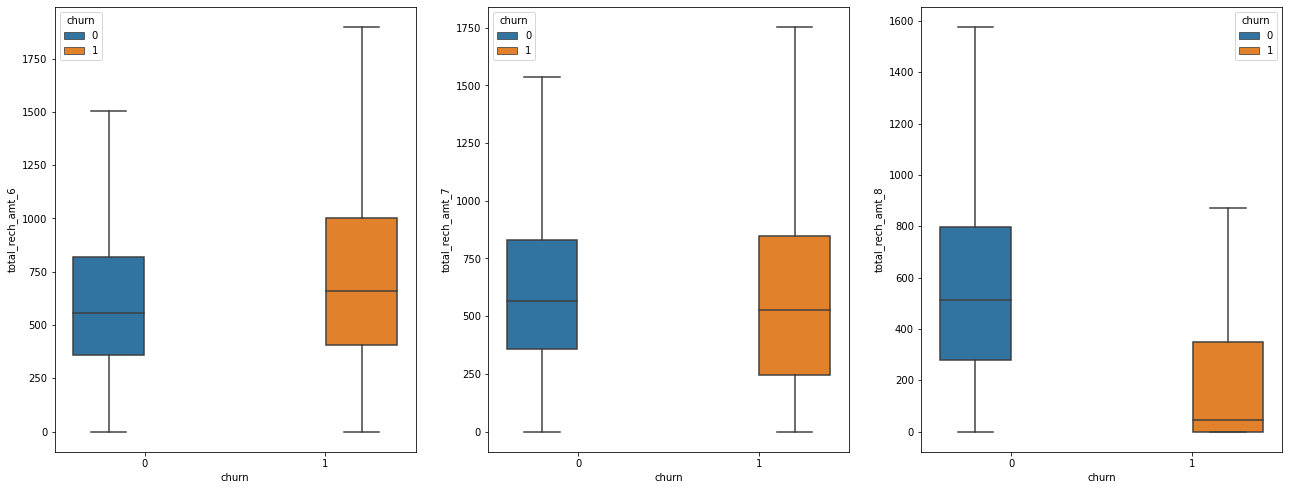

In [46]:
# Ploting for the total recharge amount:
plot_box_plot(df_telecom_churn_data_hvc,'total_rech_amt')

#### Above plot reflects there is a significant drop in the recharge amount for the churn customers

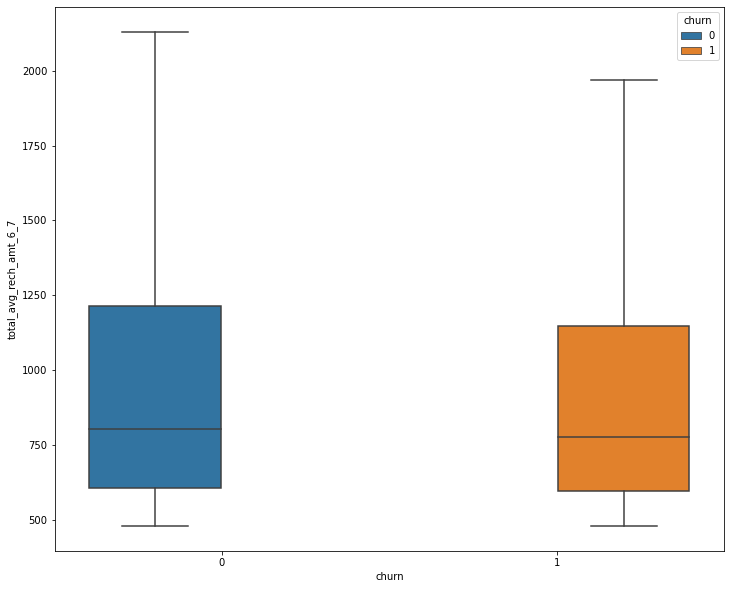

In [47]:
# Plotting the Box plot for the average recharge amount for the good phase

plt.figure(figsize=(12,10))
sns.boxplot(data=df_telecom_churn_data_hvc, y="total_avg_rech_amt_6_7",x="churn",hue="churn",
                showfliers=False)
plt.show()

#### Also the average recahrge amount in the good phase is slightly less for the churn customers

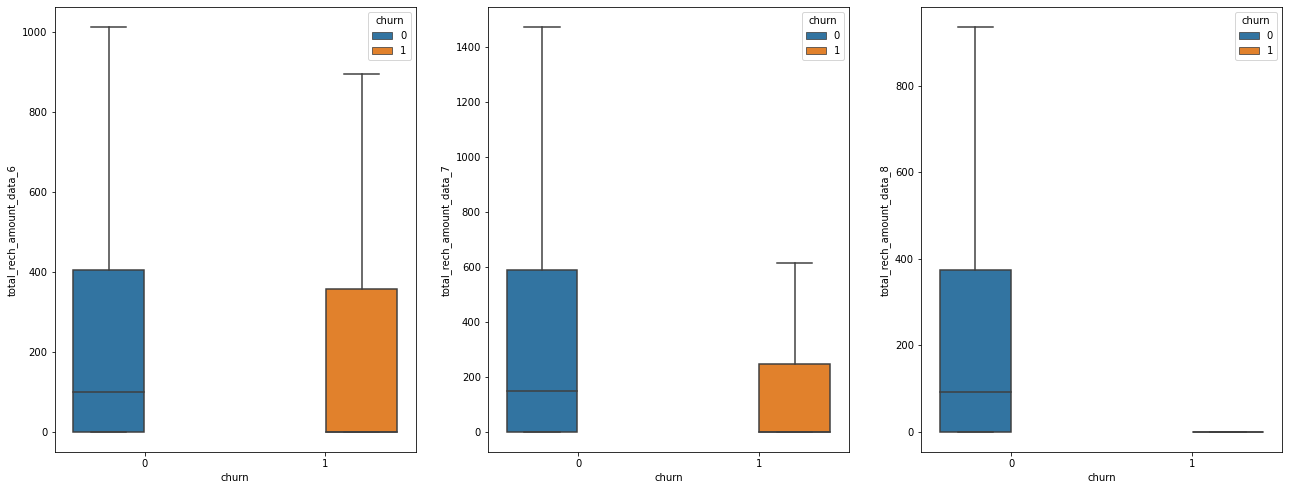

In [48]:
# Ploting for the total recharge amount for data:
plot_box_plot(df_telecom_churn_data_hvc,'total_rech_amount_data')

#### Above reflects the recharge amount for the data has reduced significantly and almost to 0 in the action month

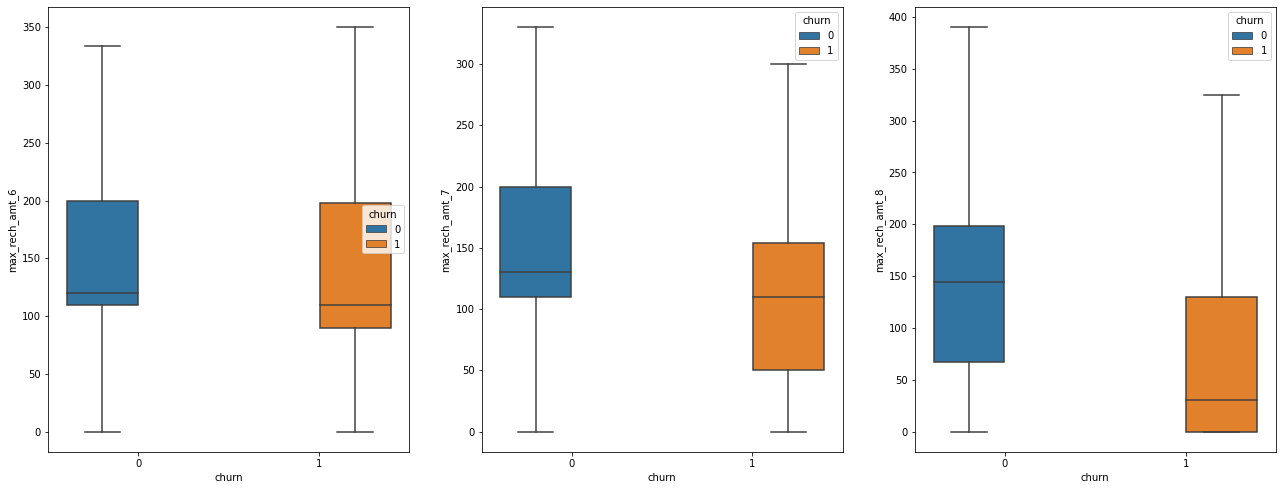

In [49]:
# Ploting for the maximum recharge amount for data:
plot_box_plot(df_telecom_churn_data_hvc,'max_rech_amt')

#### It is clearly visible that maximum recahrge amount has also reduced for the churned customers in the 8th month

Text(0.5, 1.0, 'Churn Distribution')

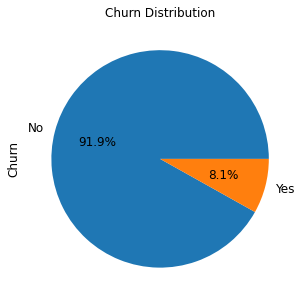

In [50]:
# Plotting distribution of Churn data

ax = (df_telecom_churn_data_hvc['churn'].value_counts()*100.0 /len(df_telecom_churn_data_hvc))\
        .plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

Above graph reflects the skewness in the data and this needs to be taken care during modelling process

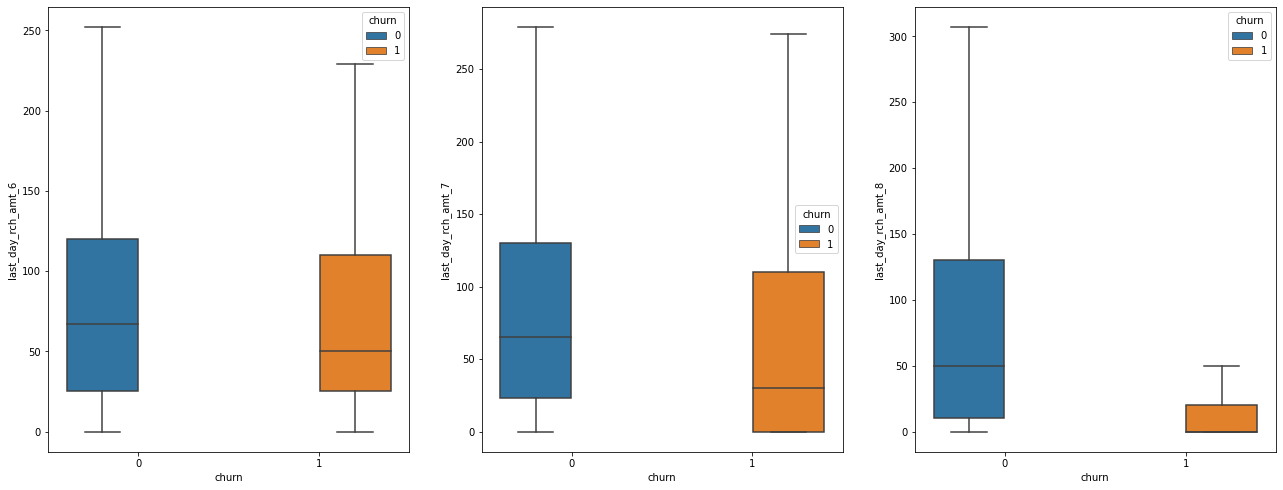

In [51]:
# Ploting for the last day recharge amount

plot_box_plot(df_telecom_churn_data_hvc,'last_day_rch_amt')


As reflected above there is a significant drop in the action month for churned customers

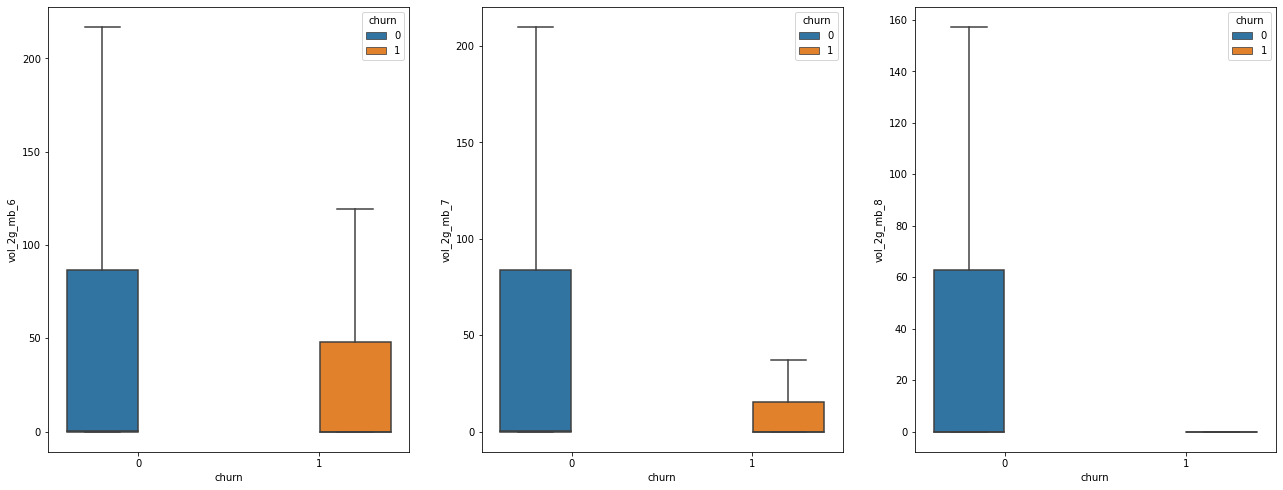

In [52]:
# Ploting for the 2g usage

plot_box_plot(df_telecom_churn_data_hvc,'vol_2g_mb')

2g usage has dropped for churned customers in the 8th month

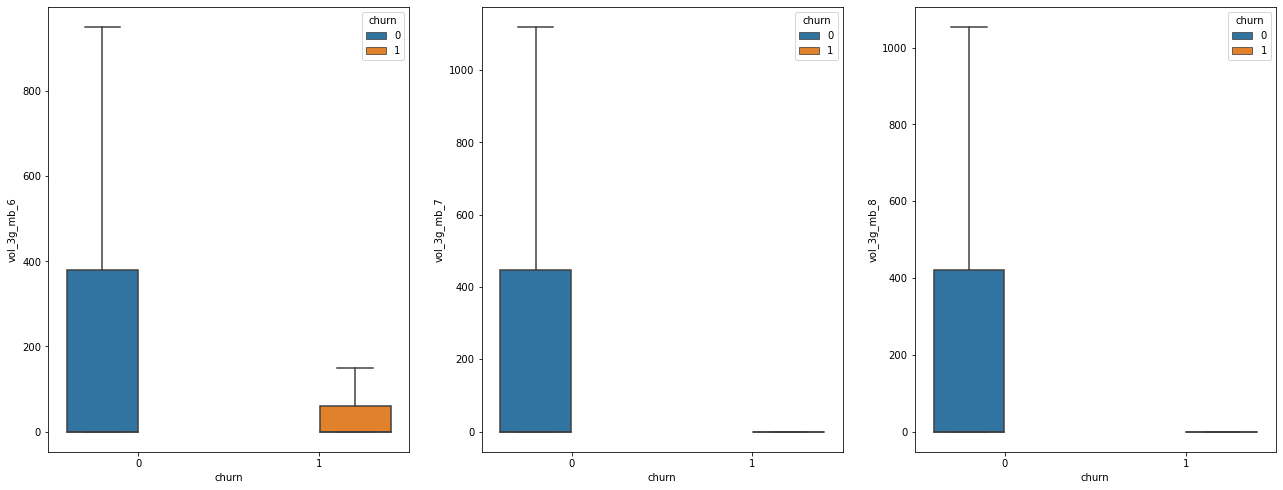

In [53]:
# Ploting for the 3g usage

plot_box_plot(df_telecom_churn_data_hvc,'vol_3g_mb')

As far as 3g usage is concerned it reflects it was less in the good phase as well for the churned customers,
indicating no proper data service in the areas or usage by these customers

In [54]:
# defining a funciton to plot bar charts for the data

def plot_bar_chart(df,columns):
    df_0 = df[df.churn==0].filter(columns)
    df_1 = df[df.churn==1].filter(columns)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

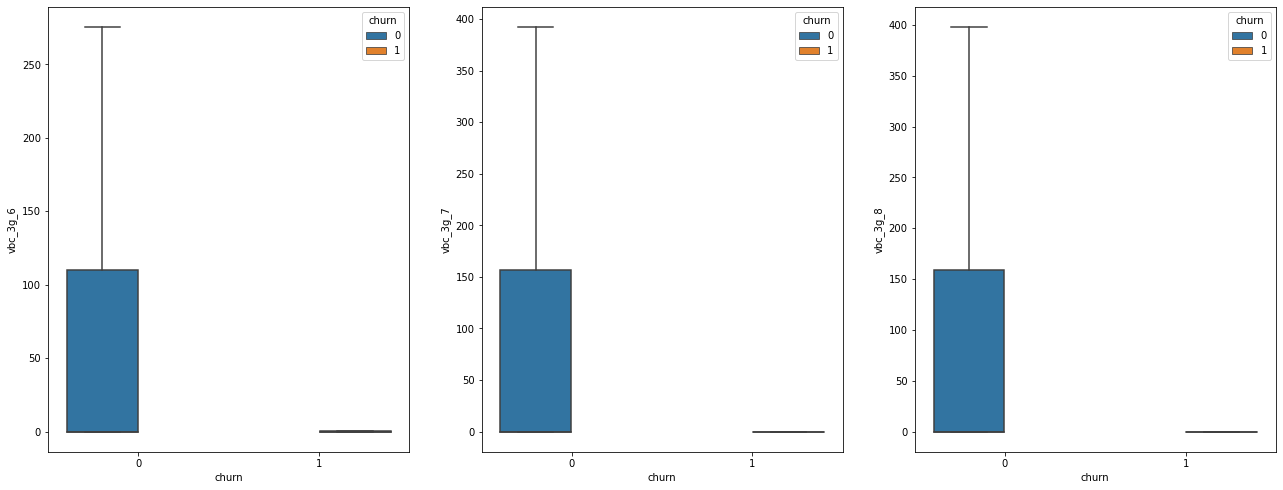

In [55]:
# Ploting the box plot for volume based cost

plot_box_plot(df_telecom_churn_data_hvc,'vbc_3g')


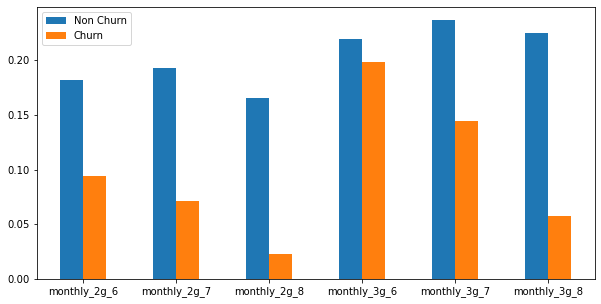

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181613,0.193096,0.165080,0.219840,0.236882,0.224891
Churn,0.093711,0.071106,0.023017,0.198109,0.144266,0.057131


In [56]:
# Plotting the bar chart for the montly subscription columns indicating 2g and 3g usage

monthly_subs_2g_and_3g = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8'] 
plot_bar_chart(df_telecom_churn_data_hvc, monthly_subs_2g_and_3g)

Above chart reflects consistent fall in the 2g and 3g usage for the churned customers

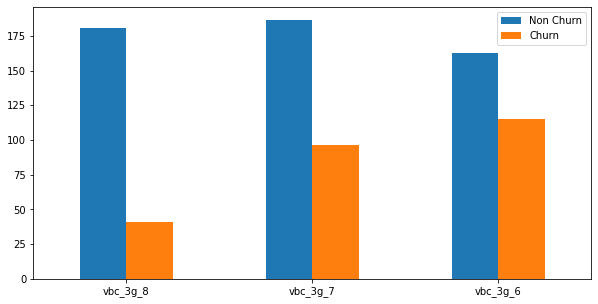

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.622636,186.370503,162.557305
Churn,40.940884,96.340707,115.461780


In [57]:
# Plotting the bar chart for the volumne based columns
volume_based_columns = ['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']
plot_bar_chart(df_telecom_churn_data_hvc, volume_based_columns)

This chart reflects the fall in the 3g volume for the churned customers

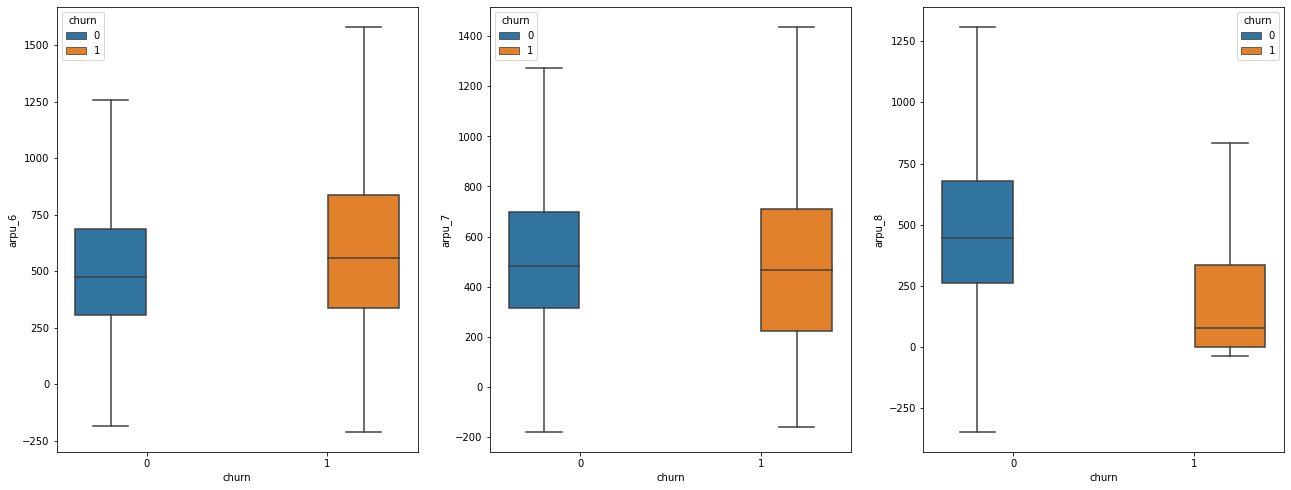

In [58]:
# Ploting the box plot for ARPU

plot_box_plot(df_telecom_churn_data_hvc,'arpu')

Revenue was high in the 6th month(i.e good phase) for the churned customers, while it started falling and dropped in 8th month 

In [59]:
# Finding the corelations between the columns.
plt.figure(figsize=(20,10))
corr= df_telecom_churn_data_hvc.corr()
corr

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amount_data_6,total_rech_amount_data_7,total_rech_amount_data_8,total_avg_rech_amt_6_7,churn,aon_in_months
mobile_number,1.000000,0.033830,0.029606,0.034434,0.010453,0.006272,0.008411,0.022643,0.013711,0.020088,0.010750,-0.002397,0.005041,0.005777,-0.001375,-0.002988,0.047800,0.045449,0.044625,0.079822,0.077058,0.080623,0.051734,0.052730,0.056273,-0.011930,-0.014405,-0.006177,0.084701,0.081790,0.082789,-0.016292,-0.019482,-0.015177,-0.024903,-0.028205,-0.024585,0.026126,0.018299,0.022086,-0.027031,-0.031570,-0.026026,-0.003303,-0.002934,-0.003758,-0.018374,-0.020769,-0.012999,-0.006557,-9.072936e-04,0.000608,0.021853,0.013831,0.019720,0.033193,0.030424,0.033686,0.063875,0.058778,6.140191e-02,0.054962,0.056733,0.054255,0.069729,0.065544,0.067783,-0.001026,0.003857,-0.000492,-0.010414,-0.011039,-0.012903,0.014966,0.012050,0.013830,-0.005938,-0.004119,-0.007873,0.059021,0.054568,0.055421,-0.022649,-0.002471,-0.029687,0.003304,0.001803,0.001343,0.013455,0.009253,0.009260,-0.028704,-0.042862,-0.036353,0.033014,0.032695,0.032464,0.058169,0.058708,0.063461,0.045298,0.051996,0.044837,-0.000805,0.003901,0.011343,-0.015740,-0.018754,-0.019310,-0.019869,-0.010329,-0.006428,0.008776,0.009311,0.007369,-0.042137,-0.041104,-0.032541,0.003651,0.005744,0.014385,-0.014808,-0.013129,-0.009653,-0.031976,-0.027987,-0.037743,-0.007536,-0.018244,-0.018421,-0.007618,-0.005710,-0.029966,0.315511
arpu_6,0.033830,1.000000,0.671846,0.612987,0.342260,0.215989,0.186672,0.509260,0.339561,0.285630,0.126893,0.083509,0.090328,0.196093,0.143347,0.124921,0.167210,0.127556,0.123628,0.332242,0.245107,0.218248,0.139404,0.114370,0.104217,0.047532,0.010440,0.012606,0.328905,0.246137,0.223297,0.273954,0.161416,0.133698,0.301526,0.181611,0.140215,0.066667,0.053517,0.043861,0.385718,0.230442,0.182271,0.467008,0.420852,0.413600,0.122595,0.068867,0.045086,0.054719,2.434622e-02,0.015483,0.554358,0.363330,0.302143,0.082688,0.062846,0.062760,0.188477,0.149110,1.241241e-01,0.051415,0.039162,0.037287,0.181713,0.142376,0.124100,0.088031,0.061527,0.056840,0.098709,0.065808,0.063078,0.034410,0.032510,0.022898,0.125032,0.085703,0.079458,0.225813,0.168902,0.150710,

<Figure size 1440x720 with 0 Axes>

In [60]:
# Defining the function for the heatmap generation

def create_heatmap(dataframe,x,y):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="BrBG",annot=True)
    plt.show()

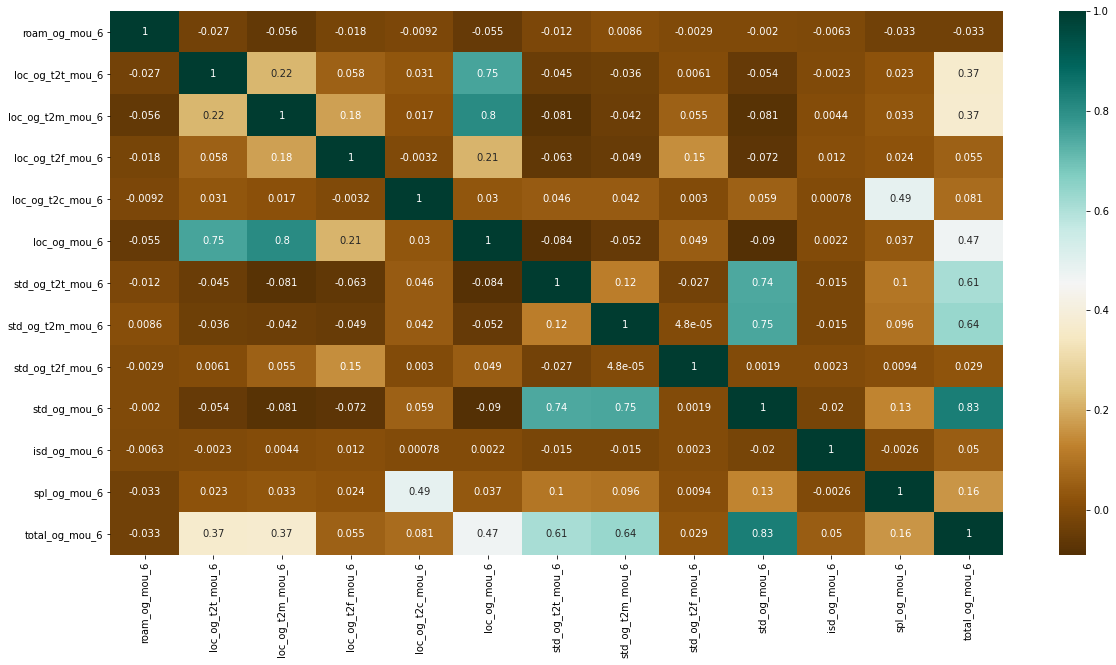

In [61]:
# Data for the correlations is too large to interpret, hence focussing on similar group basis
# For instance creating HeatMap for the mou columns (related to the outgoing calls) for the 6th month

mou_columns_6 = df_telecom_churn_data_hvc.columns[df_telecom_churn_data_hvc.columns.\
                                                    str.contains('.*_og_.*mou_6',regex=True)]


# Create the heatmap to check the correlation.
create_heatmap(df_telecom_churn_data_hvc.filter(mou_columns_6),20,10)


In [62]:
# There is a high correlation between certain columns in the above heatmap
# There are certain columns observed which are the sum of the other columns in the dataset
# for example total_og_mou_6 is the sum of loc_og_mou_6,std_og_mou_6,spl_og_mou_6,isd_og_mou_6,og_others_6

# Lets check one of the data row to valdiate the above statement
print(df_telecom_churn_data_hvc.loc[7,'total_og_mou_6'])

print(df_telecom_churn_data_hvc.loc[7,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']]\
      .sum())

487.53
487.52000000000004


As validated above total is the combination of rest of the columns in the data, total columns can be removed

In [63]:
# Dropping all the columns which are sum of the other columns in the data set

total_og_cols = df_telecom_churn_data_hvc.columns[df_telecom_churn_data_hvc.columns.str.\
                                                        contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
df_telecom_churn_data_hvc.drop(total_og_cols,axis=1,inplace=True)
df_telecom_churn_data_hvc.shape

(29953, 128)

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')


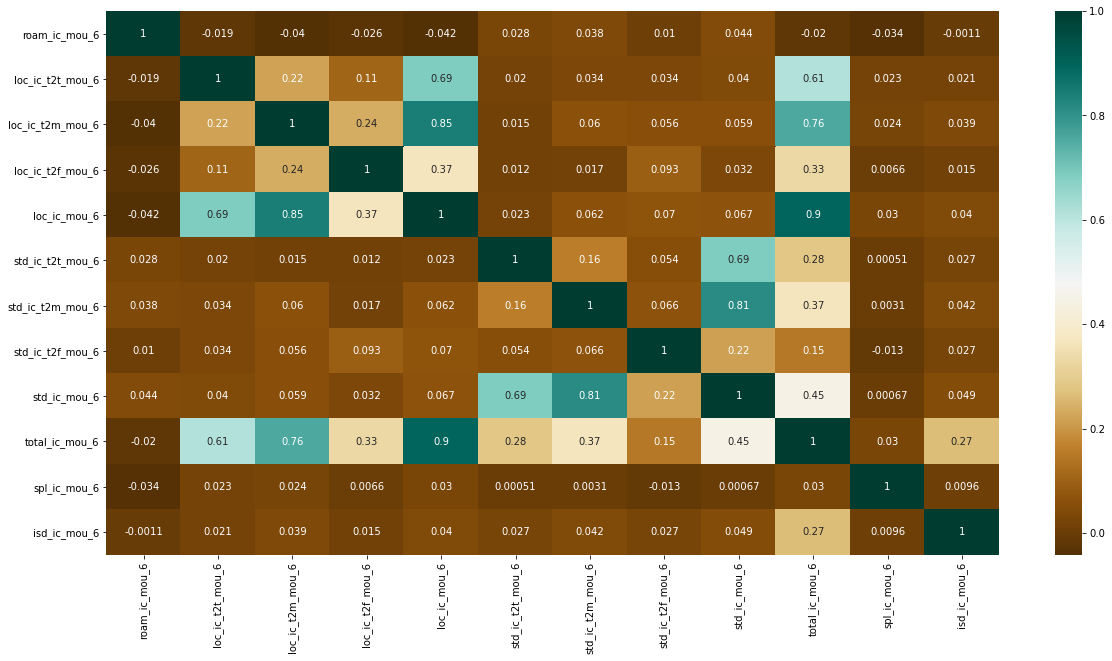

In [64]:
mou_incoming_cols_6 = df_telecom_churn_data_hvc.columns\
        [df_telecom_churn_data_hvc.columns.str.contains('.*_ic_.*mou_6',regex=True)]
print(mou_incoming_cols_6)

# Finding the corelations between the columns related to the Incoming calls.

create_heatmap(df_telecom_churn_data_hvc.filter(mou_incoming_cols_6),20,10)

In [65]:
# There is a high coorelation between the variables here, similar was observed in the outgoing columns as well

# Lets check one of the data row to valdiate the above statement
print(df_telecom_churn_data_hvc.loc[7,'total_ic_mou_6'])

print(df_telecom_churn_data_hvc.loc[7,['loc_ic_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6']]\
      .sum())

total_ic_cols = df_telecom_churn_data_hvc.columns\
            [df_telecom_churn_data_hvc.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

# Dropping the total related columns

df_telecom_churn_data_hvc.drop(total_ic_cols,axis=1,inplace=True)
df_telecom_churn_data_hvc.shape

626.46
626.92


(29953, 119)

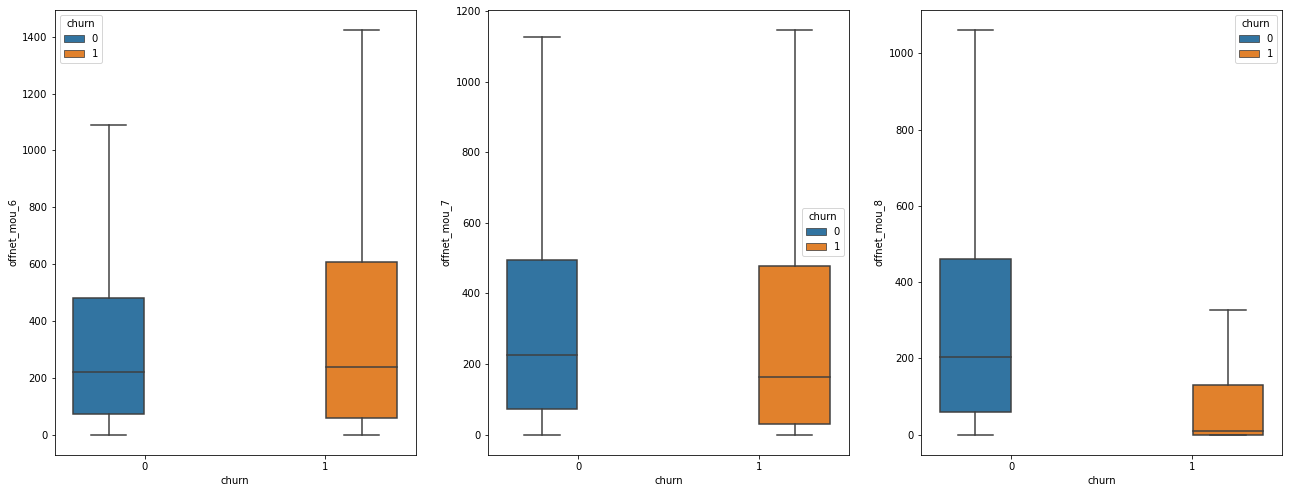

In [66]:
# Ploting the box plot for offnet

plot_box_plot(df_telecom_churn_data_hvc,'offnet_mou')

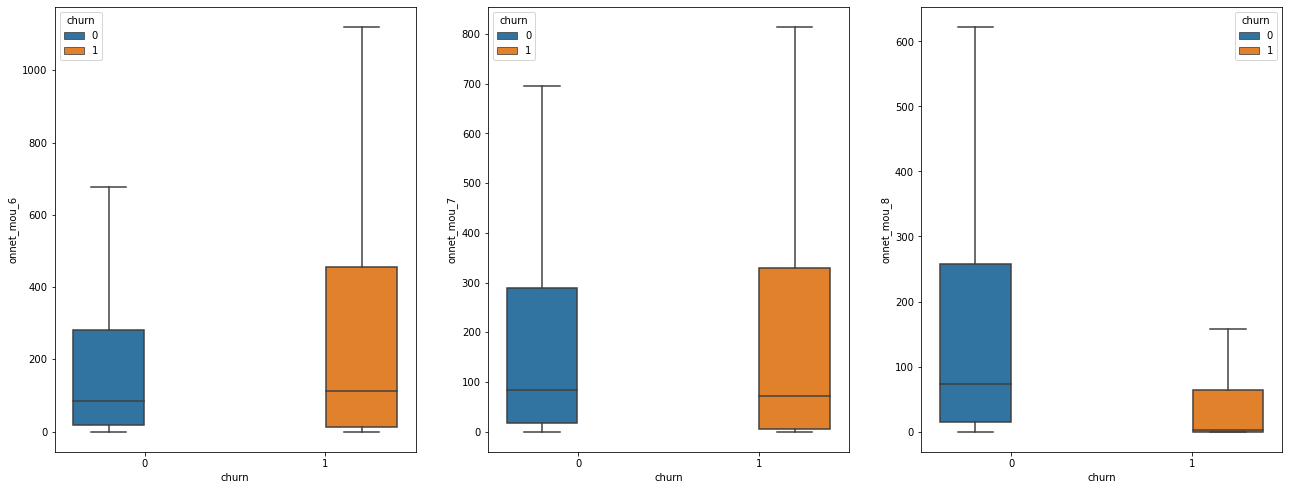

In [67]:
# Ploting the box plot for onnet

plot_box_plot(df_telecom_churn_data_hvc,'onnet_mou')

As observed above, both off network and on network calls dropped significantly in the action month (ie 8th month)

Text(0.5, 1.0, 'Customers vs tenure')

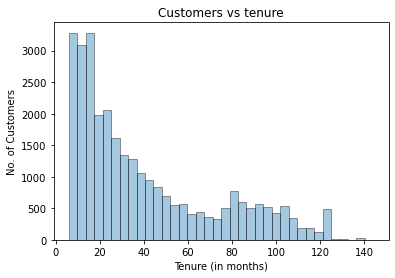

In [68]:
# Plotting the graph to check the number of customers with their tenure with the telecom company
ax = sns.distplot(df_telecom_churn_data_hvc['aon_in_months'], hist=True, kde=False, 
             bins=int(180/5),hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (in months)')
ax.set_title('Customers vs tenure')

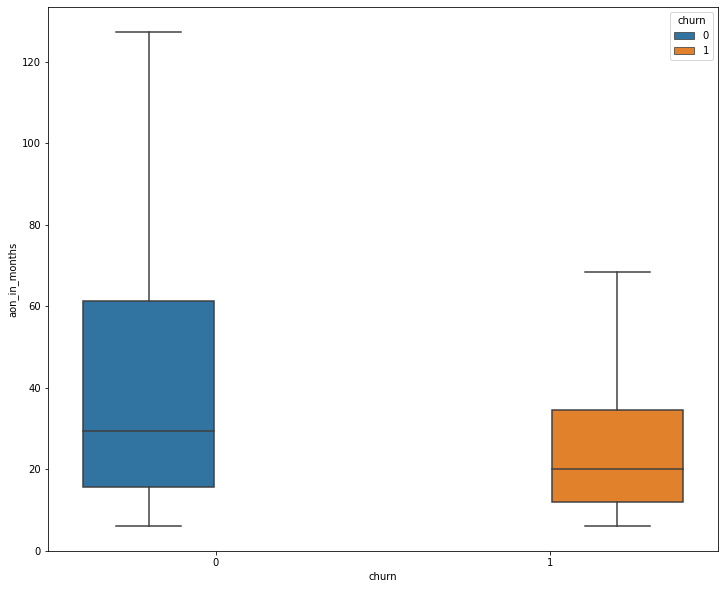

In [69]:
# Ploting the box plot for churn and age on network

plt.figure(figsize=(12,10))
sns.boxplot(data=df_telecom_churn_data_hvc, y="aon_in_months",x="churn",hue="churn",
                showfliers=False)
plt.show()


As reflected above, the churned customers have less tenure with the company

In [70]:
# Now before starting the Modelling process, we will need to remove the column which was derived to find High
# value customers and certain date columns which will not be useful in the modelling stage

df_telecom_churn_data_hvc.drop(["total_avg_rech_amt_6_7"],axis=1,inplace=True)
df_telecom_churn_data_hvc.drop(df_telecom_churn_data_hvc.filter(regex='date_').columns,axis=1,inplace=True)
print (df_telecom_churn_data_hvc.shape)


(29953, 115)


In [71]:
# Deriving the new average column, which will capture the average of the good phase i.e 6th and 7th month
# and dropping the individual columns

columns_in_good_phase = df_telecom_churn_data_hvc.filter(regex='_6|_7').columns.str[:-2]
for column in columns_in_good_phase.unique():
    print(column)
    avg_column_name = "avg_"+column+"_6_7"
    column_6 = column+"_6"
    column_7 = column+"_7"
    df_telecom_churn_data_hvc[avg_column_name] = (df_telecom_churn_data_hvc[column_6]  + \
                                                   df_telecom_churn_data_hvc[column_7])/ 2
    df_telecom_churn_data_hvc.drop([column_6,column_7],axis=1,inplace=True)

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
max_rech_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amount_data


In [72]:
# Checking the shape after above operation
print (df_telecom_churn_data_hvc.shape)

(29953, 78)


### 4. Model Implementation & Evaluations<a class="anchor" id="modelling"></a>

In [73]:
# Importing scaler libraries

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Creating a copy of the dataframe before starting the modelling process

df_telecom_churn_data_for_model=df_telecom_churn_data_hvc.copy()

# dropping te Mobile number, as this will not be used for the modelling process
df_telecom_churn_data_for_model.drop(["churn","mobile_number"],axis=1)

# defining a function to split the data
def split_data(dataframe):
    y = dataframe["churn"]
    X = dataframe.drop(["churn"],axis=1)
    return X,y

def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    return X_scale_final

In [74]:
# Split the data and scale the independent variables 
X,y=split_data(df_telecom_churn_data_for_model)

# calling the scaling function to scale the train data
X=scale_data(X)

# Split data in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [75]:
# Checking the shape of the train and test split
print(X_train.shape)
print(X_test.shape)

(20967, 77)
(8986, 77)


In [76]:
# Checking the imbalance in the dependent variable
print("Percentage of churned cases in the Train data:",round(100*y_train.sum()/len(y_train),2))
print("Percentage of churned cases in the Test data:",round(100*y_test.sum()/len(y_test),2))

Percentage of churned cases in the Train data: 8.12
Percentage of churned cases in the Test data: 8.12


### 4.1 Dataset Imbalance Treatment (SMOTE)<a class="anchor" id="imbalanceTreatment"></a>

In [77]:
# Now since there is an imbalance in the data set, we need to balance it, so that we can avoid False positives

# importing SMOTE
from imblearn.over_sampling import SMOTE

#Initializing SMOTE: Synthetic Minority Over-sampling Technique
# using this as data is skewed 
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)
print("Shape of train datatset after SMOTE application: "+str(X_train_smote.shape))


Shape of train datatset after SMOTE application: (38528, 77)


In [78]:
# Checking the imbalance in the dependent variable
print("Percentage of churned cases in the Train data after SMOTE:",round(100*y_train_smote.sum()/len(y_train_smote),2))

Percentage of churned cases in the Train data after SMOTE: 50.0


Imbalnced problem is rectified by SMOTE

### 4.2 Applying PCA on the Data<a class="anchor" id="pcaImpl"></a>

In [79]:
# import module for PCA

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [80]:
# Let's check the shape of the train data
X_train_smote.shape

(38528, 77)

In [81]:
pca = PCA(random_state=18)

In [82]:
pca.fit(X_train_smote)

PCA(random_state=18)

In [83]:
pca.components_

array([[ 3.38962335e-02,  2.93163915e-01,  1.22436700e-01, ...,
        -2.75842217e-02,  4.37173653e-02, -2.18283560e-02],
       [ 2.10269517e-02,  2.21521501e-02, -1.17957848e-01, ...,
         6.77410292e-02,  2.15446052e-01,  1.57611527e-01],
       [-1.28709321e-02, -9.66824718e-02, -8.72370197e-02, ...,
        -1.27017968e-02, -7.83434292e-03, -1.91882247e-02],
       ...,
       [ 6.23085076e-04, -9.59673491e-04,  3.08935883e-01, ...,
         4.54310101e-04, -1.07617047e-03, -3.61155614e-04],
       [-1.73957738e-04, -2.86558395e-03, -2.50946266e-01, ...,
         2.55303512e-05,  1.90101245e-04, -1.79899557e-05],
       [ 1.94327347e-05, -1.55580618e-03, -4.20358531e-01, ...,
         5.66938118e-05, -7.12524294e-05, -1.64912811e-04]])

In [84]:
# Look at the explained variance ratio of each component
pca.explained_variance_ratio_

array([1.02272878e-01, 8.09416048e-02, 6.62828644e-02, 5.45769299e-02,
       4.63827655e-02, 4.31173026e-02, 3.86262719e-02, 3.02663811e-02,
       2.70708722e-02, 2.55919782e-02, 2.50164095e-02, 2.26475156e-02,
       2.07477774e-02, 2.01118060e-02, 1.85566297e-02, 1.83147258e-02,
       1.66931930e-02, 1.61033802e-02, 1.57384167e-02, 1.54536582e-02,
       1.50757143e-02, 1.46927746e-02, 1.42608557e-02, 1.36817574e-02,
       1.27939958e-02, 1.21912666e-02, 1.16519824e-02, 1.03851014e-02,
       1.00086309e-02, 9.91095057e-03, 9.85399224e-03, 8.80261980e-03,
       8.58304619e-03, 8.41626635e-03, 8.31052697e-03, 7.73783780e-03,
       7.51816265e-03, 7.09270225e-03, 6.60941610e-03, 6.57842286e-03,
       5.90934049e-03, 5.72227443e-03, 5.12326500e-03, 4.90204258e-03,
       4.51737010e-03, 4.21281555e-03, 4.19215275e-03, 3.79346577e-03,
       3.64651511e-03, 3.45267473e-03, 3.28633666e-03, 3.18069803e-03,
       3.02714088e-03, 2.95012389e-03, 2.78156125e-03, 2.58798881e-03,
      

### 4.3 Scree Plot Creation<a class="anchor" id="screePlot"></a>

In [85]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_)

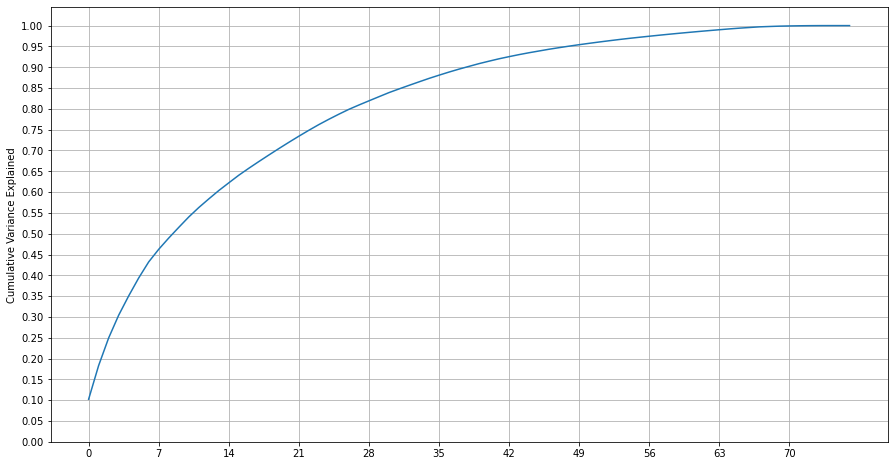

In [86]:
fig = plt.figure(figsize=[15,8])
plt.plot(var_cumsum)
plt.yticks(np.arange(0,1.05,0.05))
plt.xticks(np.arange(0,77,7))
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

#### Above plot suggests that almost 90% of variance can be explained with help of around 38 components

In [87]:
# Let's perform incremental PCA with 38 components
pca_final = IncrementalPCA(n_components=38)

In [88]:
df_train_pca = pca_final.fit_transform(X_train_smote)

In [89]:
df_train_pca.shape

(38528, 38)

In [90]:
# Checking correlation among selected components
cor_mat=np.corrcoef(df_train_pca.transpose())
cor_mat.shape

(38, 38)

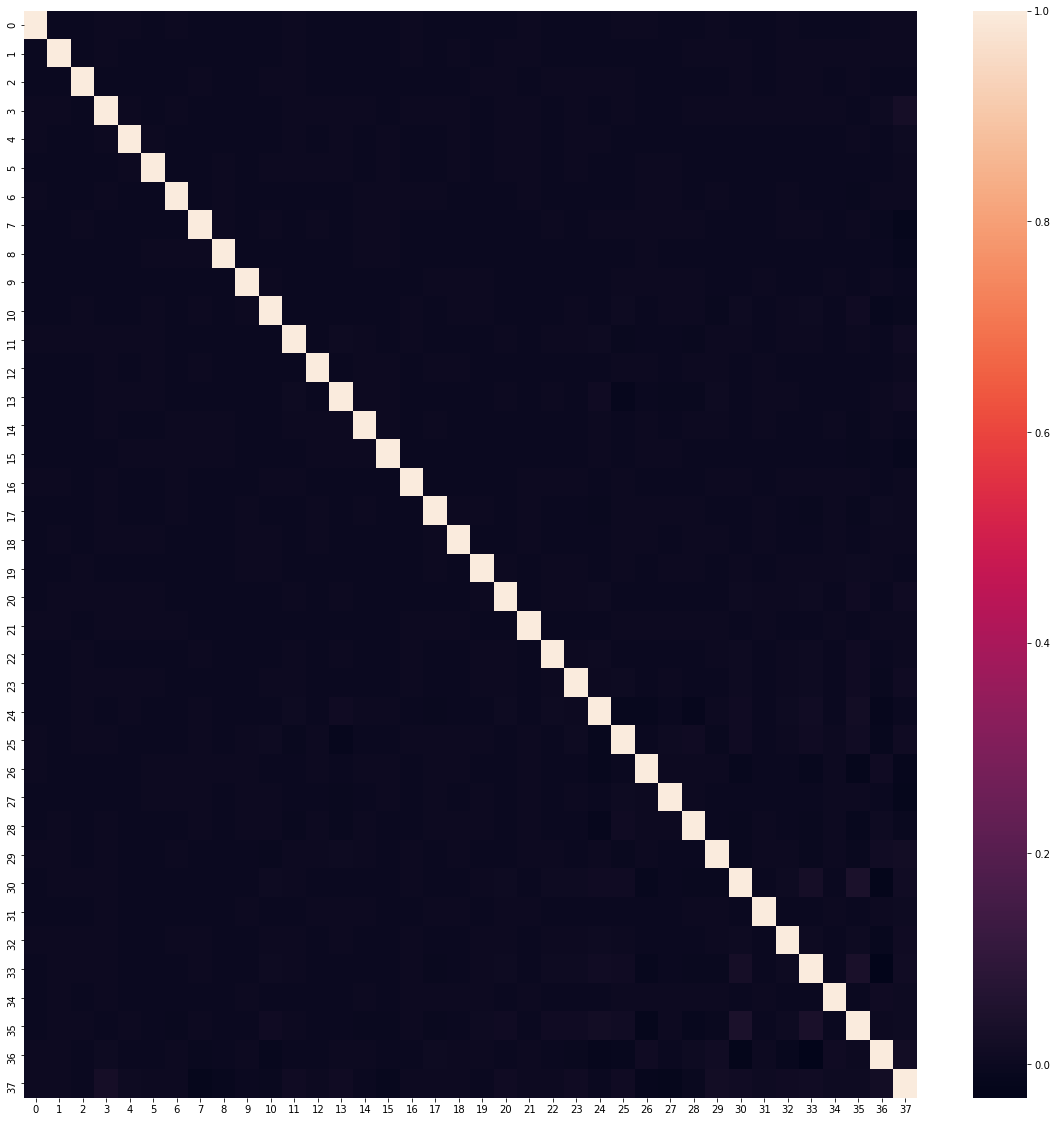

In [91]:
# Plotting heatmap for correlation matrix
plt.figure(figsize=[20,20])
sns.heatmap(cor_mat,annot=False)

#### Above heatmap shows that we have significantly reduced the amount of correlation, all values are very close to zero.

In [92]:
# Let's perform transformation on the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 38)

In [93]:
# Lets define a generic function which can be reused to calculate the accuracy metrics for a model

#importing libraries
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

models_summary = pd.DataFrame()

# Function to find metrics of the model
def find_model_metrics(y_test,y_pred,model):
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()
    
    accuracy = round(metrics.accuracy_score(y_test,y_pred),2)
    recall = round(metrics.recall_score(y_test,y_pred),2)
    precision = round(metrics.precision_score(y_test,y_pred),2)
    auc = round(metrics.roc_auc_score(y_test,y_pred),2)
    f1 = round(metrics.f1_score(y_test,y_pred),2)
    
    data = [[model,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    push_to_models_summary(df)
    return df 

# Function to be used to display final summary
def push_to_models_summary(df) :
    global models_summary 
    models_summary = models_summary.append(df,ignore_index=True)
    

#Defining a function to plot the confusion matrix
def plot_confusion_matrix(confusion_matrix):
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, confusion_matrix[i, j],horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 4.4 Performing Logistic Regression With PCA<a class="anchor" id="lrpca"></a>

In [94]:
lr_learner_pca=LogisticRegression()

In [95]:
# Fitting the model on train data
lr_model_pca = lr_learner_pca.fit(df_train_pca, y_train_smote)

In [96]:
# Making prediction on the test data
lr_pred_probs_test_pca = lr_model_pca.predict_proba(df_test_pca)[:,1]
print("Logistic Regression With PCA Accuracy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, lr_pred_probs_test_pca)))

Logistic Regression With PCA Accuracy : 0.87


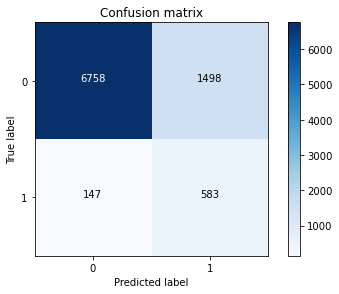

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression - With PCA,0.82,0.8,0.28,0.81,0.41


In [97]:
# Finding the metrics for the Logistic Regression with PCA
find_model_metrics(y_test,lr_pred_probs_test_pca.round(),"Logistic Regression - With PCA")

#####  As seen above with PCA, Logistic Regression is able to predict with 82% accuracy

### 4.5 Performing Logistic Regression Without PCA<a class="anchor" id="lr"></a>

In [98]:
# importing metrics library
from sklearn import metrics

# creating LR object
lr = LogisticRegression()

model = lr.fit(X_train_smote,y_train_smote)

#Making prediction on the test data
pred_probs_test = model.predict_proba(X_test)[:,1]

print("Logistic Regression Without PCA Accuracy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

Logistic Regression Without PCA Accuracy : 0.89


In [99]:
# The model built above uses all the independent variables in the data set,

# Lets do the feature reduction using RFE and check the model accuracy

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(lr, 20)   
rfe = rfe.fit(X_train_smote, y_train_smote)


list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('mobile_number', False, 57),
 ('arpu_8', False, 8),
 ('onnet_mou_8', False, 43),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 44),
 ('roam_og_mou_8', False, 4),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', False, 33),
 ('loc_og_t2f_mou_8', False, 26),
 ('loc_og_t2c_mou_8', False, 22),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', False, 3),
 ('std_og_t2f_mou_8', False, 12),
 ('isd_og_mou_8', False, 36),
 ('spl_og_mou_8', False, 21),
 ('og_others_8', False, 40),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 5),
 ('std_ic_t2m_mou_8', False, 10),
 ('std_ic_t2f_mou_8', False, 19),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 25),
 ('ic_others_8', False, 38),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 6),
 ('max_rech_amt_8', False, 7),
 ('last_day_rch_amt_8', True, 1),
 ('max_rech_data_8', True, 1),
 ('vol_2g_mb_8', False, 11),
 ('vol_3g_mb_8', False, 41),
 ('

In [100]:
# Columns found by RFE
col = X_train_smote.columns[rfe.support_]

In [101]:
# Using the stats model api to see the stats after the Feature selection by RFE

import statsmodels.api as sm

# Using columns found by RFE
X_train_sm = sm.add_constant(X_train_smote[col])
logm2 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 29 Mar 2021   Deviance:                          inf
Time:                        21:16:27   Pearson chi2:                 4.50e+15
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.2563      0.034    -67.306      0.000      -2.322      -2.191
offnet_mou_8                -0.3716      0.024    -15.335      0.000      -0.419      -0.324
loc_og_t2t_mou_8            -0.9565      0.081    -11.860      0.000      -1.115      -0.798
std_og_t2t_mou_8            -0.3490      0.020    -17.375      0.000      -0.388      -0.310
loc_ic_t2t_mou_8            -0.8181      0.070    -11.693      0.000      -0.955      -0.681
loc_ic_t2m_mou_8            -2.7329      0.077    -35.690      0.000      -2.883      -2.583
loc_ic_t2f_mou_8            -0.6976      0.059    -11.763      0.000      -0.814      -0.581
spl_ic_mou_8                -0.2965      0.025    -11.947      0.000      -0.345      -0.248
total_rech_num_8            -0.4382      0.025    -17.239      0.000      -0.488      -0.388
last_day_rch_amt_8          -0.3872      0.020    -19.380      0.000      -0.426      -0.348
max_rech_data_8             -0.2715      0.028     -9.643      0.000      -0.327      -0.216
monthly_2g_8                -0.4761      0.032    -14.731      0.000      -0.539      -0.413
sachet_2g_8                 -0.8244      0.035    -23.843      0.000      -0.892      -0.757
monthly_3g_8                -0.4217      0.037    -11.275      0.000      -0.495      -0.348
sachet_3g_8                 -0.3069      0.039     -7.841      0.000      -0.384      -0.230
vbc_3g_9                    -1.4225      0.105    -13.577      0.000      -1.628      -1.217
total_rech_amount_data_8     0.2872      0.058      4.919      0.000       0.173       0.402
avg_arpu_6_7                 0.5609      0.023     24.098      0.000       0.515       0.607
avg_loc_og_t2t_mou_6_7       0.3573      0.045      7.946      0.000       0.269       0.445
avg_loc_ic_t2m_mou_6_7       0.7133      0.044     16.255      0.000       0.627       0.799
avg_monthly_2g_6_7          -0.2815      0.022    -12.702      0.000      -0.325      -0.238
============================================================================================
"""

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,total_rech_amount_data_8,3.12
12,monthly_3g_8,2.83
1,loc_og_t2t_mou_8,2.82
4,loc_ic_t2m_mou_8,2.73
9,max_rech_data_8,2.73
17,avg_loc_og_t2t_mou_6_7,2.71
18,avg_loc_ic_t2m_mou_6_7,2.26
11,sachet_2g_8,2.01
10,monthly_2g_8,1.99
7,total_rech_num_8,1.88


In [103]:
#Making prediction on the test data
model = lr.fit(X_train_smote[col],y_train_smote)
y_pred_test = model.predict_proba(X_test[col])[:,1]

print("Logistic Regression Accuracy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_test)))

Logistic Regression Accuracy : 0.88


In [104]:
print(y_pred_test.round())

[0. 0. 0. ... 0. 1. 1.]


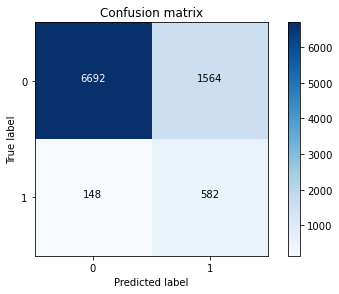

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression - Without PCA,0.81,0.8,0.27,0.8,0.4


In [105]:
# Finding the metrics for the Logistic Regression without PCA

find_model_metrics(y_test,y_pred_test.round(),"Logistic Regression - Without PCA")

#####  As seen above with feature selection Logistic Regression is able to predict with 81% accuracy

### 4.6 Performing SVM With PCA<a class="anchor" id="svmpca"></a>

In [106]:
# importing SVM library
from sklearn import svm

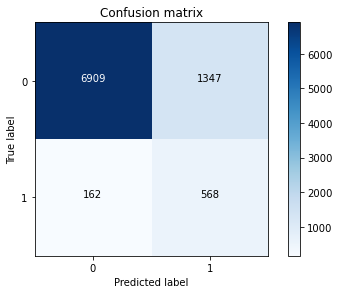

,Model,Accuracy,Precision,Recall,AUC,F1
0,SVM (Default) - linear With PCA,0.83,0.78,0.3,0.81,0.43


In [107]:
# Building model with linear Kernel
svm_model_pca = svm.SVC(kernel="linear") # build model
svm_model_pca.fit(df_train_pca, y_train_smote) # fit model
svm_y_pred = svm_model_pca.predict(df_test_pca) # make predictions on test

find_model_metrics(y_test,svm_y_pred,"SVM (Default) - linear With PCA")

#####  As seen above with PCA, SVM is able to predict with 83% accuracy

### 4.7 Performing SVM Without PCA<a class="anchor" id="svm"></a>

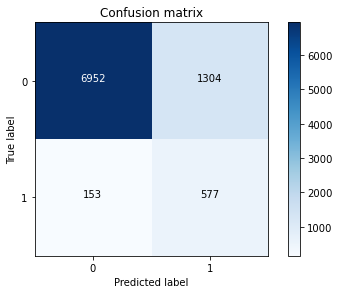

,Model,Accuracy,Precision,Recall,AUC,F1
0,SVM (Default) - linear Without PCA,0.84,0.79,0.31,0.82,0.44


In [108]:
# Building model with linear Kernel
svm_model = svm.SVC(kernel="linear") # build model
svm_model.fit(X_train_smote, y_train_smote) # fit model
svm_y_pred = svm_model.predict(X_test) # make predictions on test

find_model_metrics(y_test,svm_y_pred,"SVM (Default) - linear Without PCA")

#####  As seen above without PCA, SVM is able to predict with 84% accuracy

### 4.8 Performing RandomForest With PCA<a class="anchor" id="rfpca"></a>

In [131]:
# Now we will use Random Forest to predict the churn and check model accuracy

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve

In [110]:
#Creating the RandomForestClassifier object with default params

rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(df_train_pca,y_train_smote)

RandomForestClassifier(random_state=42)

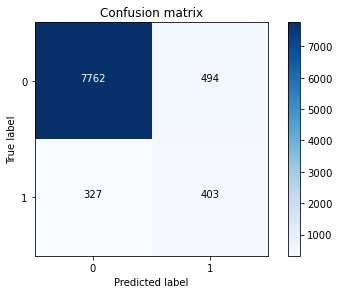

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest - Default (With PCA),0.91,0.55,0.45,0.75,0.5


In [111]:
# Lets make predections on the test data
rf_y_test_pred_pca = rf_model_pca.predict(df_test_pca)
find_model_metrics(y_test,rf_y_test_pred_pca,"Random Forest - Default (With PCA)")

#####  As seen above with PCA, RandomForest is able to predict with 91% accuracy

### 4.9 Performing RandomForest With HPT & PCA<a class="anchor" id="rfhptpca"></a>

In [112]:
# importing modules for Hyperprams Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,GridSearchCV


In [113]:
# Defining the params for Hyperparameter tuning
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

# creating grid search object
grid_search_rf_pca = GridSearchCV(estimator=rf_model_pca,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [114]:
# Fitting on grid search to find the best params

grid_search_rf_pca.fit(df_train_pca, y_train_smote)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [115]:
# Checking the best score from the Random Forest grid search

grid_search_rf_pca.best_score_

0.9337365033222591

In [116]:
# Finding the best random forest classifier
rf_best_pca = grid_search_rf_pca.best_estimator_
rf_best_pca

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

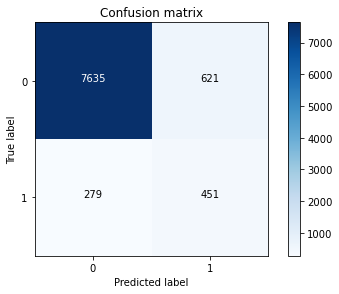

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest - HPT (With PCA),0.9,0.62,0.42,0.77,0.5


In [117]:
# Lets make predections on the test data
rf_grid_y_test_pred_pca = rf_best_pca.predict(df_test_pca)
find_model_metrics(y_test,rf_grid_y_test_pred_pca,"Random Forest - HPT (With PCA)")

#####  As seen above with PCA and HPT, RandomForest is able to predict with 90% accuracy but Precision and AUC has increased

### 4.10 Performing RandomForest Without PCA<a class="anchor" id="rf"></a>

In [118]:
#Creating the RandomForestClassifier object with default params

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

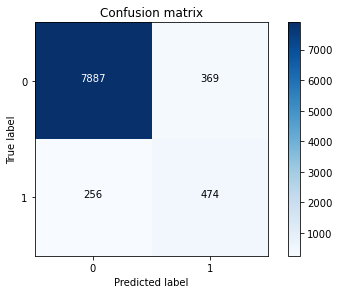

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest - Default (Without PCA),0.93,0.65,0.56,0.8,0.6


In [119]:
# Lets make predections on the test data
y_test_pred = rf_model.predict(X_test)
find_model_metrics(y_test,y_test_pred,"Random Forest - Default (Without PCA)")

#####  As seen above without PCA and HPT, RandomForest is able to predict with 93% accuracy

### 4.11 Performing RandomForest HPT Without PCA<a class="anchor" id="rfhpt"></a>

In [120]:
# Defining the params for Hyperparameter tuning
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

# creating grid search object
grid_search_rf = GridSearchCV(estimator=rf_model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")



In [121]:
# Fitting on grid search to find the best params

grid_search_rf.fit(X_train_smote, y_train_smote)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [122]:
# Checking the best score from the Random Forest grid search

grid_search_rf.best_score_

0.9474148671096346

In [123]:
# Finding the best random forest classifier
rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [124]:
# Preparing the datafram, to print feature importance against column name
imp_df = pd.DataFrame({
    "Varname": X_train_smote.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
17,loc_ic_t2m_mou_8,0.095305
5,roam_og_mou_8,0.071958
26,total_rech_amt_8,0.066639
4,roam_ic_mou_8,0.058900
1,arpu_8,0.058201
27,max_rech_amt_8,0.043433
7,loc_og_t2m_mou_8,0.043355
16,loc_ic_t2t_mou_8,0.040008
29,max_rech_data_8,0.032802
28,last_day_rch_amt_8,0.032609


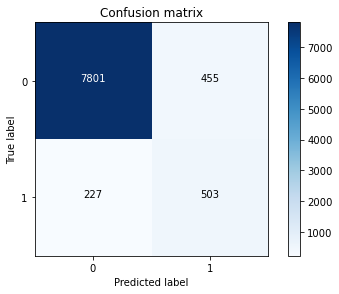

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest - HPT (Without PCA),0.92,0.69,0.53,0.82,0.6


In [125]:
# Lets make predections on the test data
y_test_pred = rf_best.predict(X_test)
find_model_metrics(y_test,y_test_pred,"Random Forest - HPT (Without PCA)")

#####  As seen above with HPT and without PCA, RandomForest is able to predict with 94% accuracy but Precision and AUC has decreased

### 4.12 Performing XGBoost With PCA<a class="anchor" id="xgbpca"></a>

In [126]:
# importing the libraries for the XgBoost
import xgboost as xgb  # Load this xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

[22:00:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


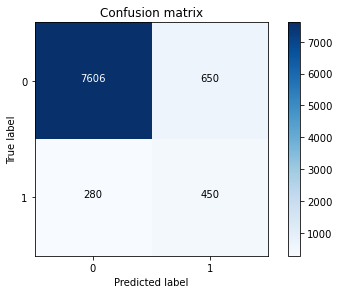

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost - (With PCA),0.9,0.62,0.41,0.77,0.49


In [129]:
# Creating the instance for the XgbClassifier

xgb_model_pca = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_model_pca.get_params()

# Fit the model to our train and target
xgb_model_pca.fit(df_train_pca, y_train_smote)  # default 

xgb_predictions_pca = xgb_model_pca.predict(df_test_pca)
find_model_metrics(y_test,xgb_predictions_pca,"XGBoost - (With PCA)")

### 4.13 Performing XGBoost Without PCA<a class="anchor" id="xgb"></a>

[22:43:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


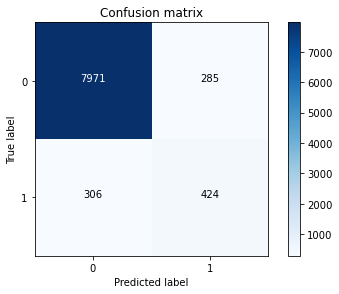

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost - Default (Without PCA),0.93,0.58,0.6,0.77,0.59


In [141]:
# fit model on training data with default hyperparameters

xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

# Fit the model to our train and target
xgb_cfl.fit(X_train_smote, y_train_smote)  # default 
# Get our predictions
y_test_pred = xgb_cfl.predict(X_test)

find_model_metrics(y_test,y_test_pred,"XGBoost - Default (Without PCA)")

### 5. Model Evaluation Matrix<a class="anchor" id="modelevaluation"></a>

In [142]:
# Model Insights
models_summary

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression - With PCA,0.82,0.80,0.28,0.81,0.41
1,Logistic Regression - Without PCA,0.81,0.80,0.27,0.80,0.40
2,SVM (Default) - linear With PCA,0.83,0.78,0.30,0.81,0.43
3,SVM (Default) - linear Without PCA,0.84,0.79,0.31,0.82,0.44
4,Random Forest - Default (With PCA),0.91,0.55,0.45,0.75,0.50
5,Random Forest - HPT (With PCA),0.90,0.62,0.42,0.77,0.50
6,Random Forest - Default (Without PCA),0.93,0.65,0.56,0.80,0.60
7,Random Forest - HPT (Without PCA),0.92,0.69,0.53,0.82,0.60
8,XGBoost - (With PCA),0.90,0.62,0.41,0.77,0.49
9,XGBoost - Default (Without PCA),0.93,0.58,0.60,0.77,0.59


- In the Logistic Regression, after applying PCA, we observed improvement in the model accuracy
- In case of SVM model, default SVM model provided better results with orignal data, than as compared to SVM model with PCA
- Random Forest provided a better overall accuracy with 90% score, and better precision score when we performed Hyper parameters tuning and PCA
- XGBoost provided similar results as that of the Random Forrest
- Looking at our business problem, we should aim for higher accuracy(even if the precision score is less) and must flag churned customers, as this will help in retaining customers and highlighting those at an earlier stage. We should consider RandomForest for predicting customers on future data in the Production environment.

In [143]:
# Important Features as found using Random Forrest

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
17,loc_ic_t2m_mou_8,0.095305
5,roam_og_mou_8,0.071958
26,total_rech_amt_8,0.066639
4,roam_ic_mou_8,0.058900
1,arpu_8,0.058201
27,max_rech_amt_8,0.043433
7,loc_og_t2m_mou_8,0.043355
16,loc_ic_t2t_mou_8,0.040008
29,max_rech_data_8,0.032802
28,last_day_rch_amt_8,0.032609


### 6. Recommendations<a class="anchor" id="observation"></a>

- Customers having tenure with the company less than 3 years are more likely to churn, company should engage with them, understand the root cause, provide certain offers to reatin these customers
- Local incoming calls from other mobile network in the action month is one of important predictor
- Total recharge amount in the action month is another important predictor
- Outgoing calls in the action month plays an important role in predicting the churn state
- Average Revenue per user is the important feature in determining the churn prediction
- Local calls, maximum recharge amount, data usage in the action phase will also help in identfying the chrun customer